# People Analytic Project - Colacho Company, Inc

## Salary Database

## 1. Import libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 2. Import our database

We are going to import our database and use it to create a new data frame for the salaries. We will use column names, surnames, work department, and ID. Also we will add some new columns too.

In [38]:
# Let's import our data frame
cdf_rawdata = pd.read_csv('colacho_database.csv')
cdf_rawdata

,Name,Surname,Gender,WorkDepartment,ID,Address,Birthday,Age
0,John,Smith,male,Account,SZ2174,0487 Hull Village Suite 759,2003-04-08,20
1,Emily,Johnson,female,Account,ZG8243,242 Christine Glen,1965-02-27,58
2,Michael,Williams,male,Sales,LB2444,1157 Michael Island,1996-10-16,27
3,Sarah,Jones,female,HHRR,ZG2248,778 Brown Plaza,1995-11-29,28
4,David,Brown,male,Operations,JE3473,60975 Jessica Squares,1957-09-02,66
...,...,...,...,...,...,...,...,...
95,Madelyn,Alexander,female,Operations,SU8337,003 Alexander Shoal Suite 105,1957-11-29,66
96,Brayden,Russell,male,Account,NU0471,37625 Thompson Isle Suite 606,1985-01-06,38
97,Elena,Griffin,female,Operations,HT8585,870 Robert Loaf Apt. 082,1963-07-05,60
98,Oliver,Diaz,male,HHRR,QH3190,53230 Julia Villages,1978-03-05,45


### 2.1 Salaries data frame

It's time to create our new data frame for the employees salaries

In [39]:
# Create the new data frame in a new variable
cdf_salary = cdf_rawdata[['ID', 'Name', 'Surname', 'WorkDepartment']].copy()

# Checking if the data frame has the information needed
cdf_salary

,ID,Name,Surname,WorkDepartment
0,SZ2174,John,Smith,Account
1,ZG8243,Emily,Johnson,Account
2,LB2444,Michael,Williams,Sales
3,ZG2248,Sarah,Jones,HHRR
4,JE3473,David,Brown,Operations
...,...,...,...,...
95,SU8337,Madelyn,Alexander,Operations
96,NU0471,Brayden,Russell,Account
97,HT8585,Elena,Griffin,Operations
98,QH3190,Oliver,Diaz,HHRR


### 2.2 Create the new columns

With the new data frame, now we can add the new columns, base salary, experience

#### 2.2.a Salary

In [40]:
# For this example we are not going to use a date to calculate the years the employees have in the company. 
# Instead, we will generate the number by using a random function

# Salaries
salary = np.random.randint(18000, 75000, size = 100)
cdf_salary['Salary'] = salary

cdf_salary 

,ID,Name,Surname,WorkDepartment,Salary
0,SZ2174,John,Smith,Account,65284
1,ZG8243,Emily,Johnson,Account,23194
2,LB2444,Michael,Williams,Sales,32951
3,ZG2248,Sarah,Jones,HHRR,74932
4,JE3473,David,Brown,Operations,52673
...,...,...,...,...,...
95,SU8337,Madelyn,Alexander,Operations,59862
96,NU0471,Brayden,Russell,Account,67130
97,HT8585,Elena,Griffin,Operations,39585
98,QH3190,Oliver,Diaz,HHRR,56409


#### 2.2.b Experience

In [41]:
# Create the random number generator
exp_years = np.random.uniform(0, 8, size=100)

# Convert the years of experience into months
exp_months = exp_years * 12

# Round our numbers into one decimal
exp_months_rounded = np.round(exp_months)

# Put the values into the column 'Experience'
cdf_salary['Experience'] = exp_months_rounded

# Check our data frame
cdf_salary

,ID,Name,Surname,WorkDepartment,Salary,Experience
0,SZ2174,John,Smith,Account,65284,54.0
1,ZG8243,Emily,Johnson,Account,23194,36.0
2,LB2444,Michael,Williams,Sales,32951,62.0
3,ZG2248,Sarah,Jones,HHRR,74932,8.0
4,JE3473,David,Brown,Operations,52673,79.0
...,...,...,...,...,...,...
95,SU8337,Madelyn,Alexander,Operations,59862,87.0
96,NU0471,Brayden,Russell,Account,67130,75.0
97,HT8585,Elena,Griffin,Operations,39585,40.0
98,QH3190,Oliver,Diaz,HHRR,56409,44.0


#### 2.3 Some numbers

Let's use .describe() method to see some details about salary information and experience

In [42]:
# Basic statistics from 'Salary' and 'Experience' columns
cdf_salary[['Salary', 'Experience']].describe()

,Salary,Experience
count,100.00000,100.000000
mean,47429.54000,43.710000
std,16910.56963,26.870169
min,18657.00000,1.000000
25%,33141.50000,19.750000
50%,47648.00000,44.000000
75%,61406.50000,68.000000
max,74932.00000,91.000000


#### 2.3.a Correlation between Salary and Experience

[[1.         0.20494779]
 [0.20494779 1.        ]]


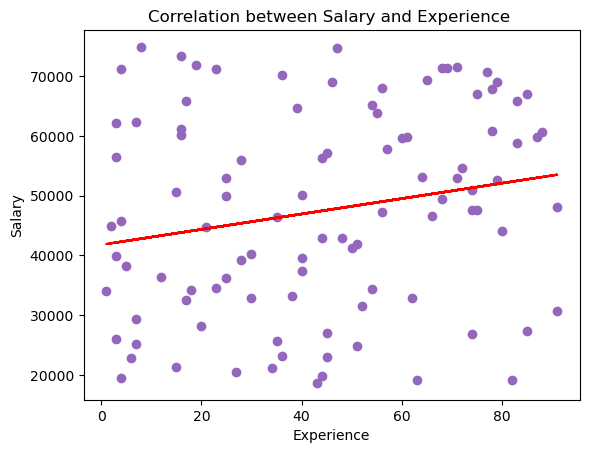

In [43]:
# Visualizing our data with a scatterplot
x = cdf_salary['Experience'];
y = cdf_salary['Salary'];
plt.scatter(x = x, y = y, color='#9467bd')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
lreg = np.corrcoef(x, y)
plt.plot(x, m*x+b, color='red')
# Labels and title
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Correlation between Salary and Experience ')
print(lreg)

In [44]:
import statsmodels.formula.api as smf
model = smf.ols('Salary ~ Experience', data = cdf_salary).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.297
Date:                Tue, 12 Dec 2023   Prob (F-statistic):             0.0408
Time:                        15:37:11   Log-Likelihood:                -1112.8
No. Observations:                 100   AIC:                             2230.
Df Residuals:                      98   BIC:                             2235.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.179e+04   3188.235     13.108      0.000    3.55e+04    4.81e+04
Experience   128.9826     62.224      2.073      0.041       5.501     252.464
==============================================================================
Omnibus:                       13.767   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.177
Skew:                          -0.051   Prob(JB):                        0.124
Kurtosis:                       2.004   Cond. No.                         98.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Let's predict our salaries for each experience years
pred1 = model.predict(pd.DataFrame(cdf_salary['Experience']))
print(pred1)

0     48756.770850
1     46435.084232
2     49788.631569
3     42823.571715
4     51981.335597
          ...     
95    53013.196316
96    51465.405238
97    46951.014592
98    47466.944951
99    44113.397614
Length: 100, dtype: float64


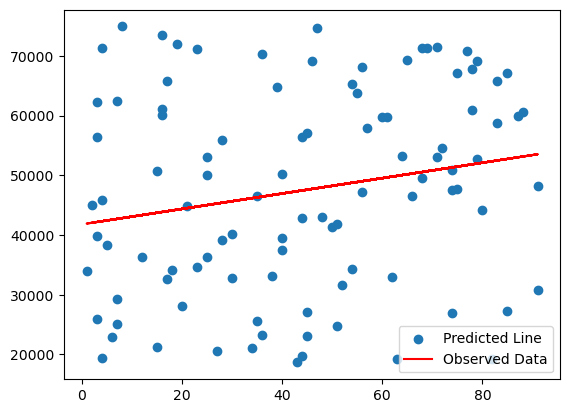

In [46]:
# Regression Line
plt.scatter(x, y)
plt.plot(x, pred1, 'r')
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [47]:
# Error Calculation
res1 = y - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
print(rmse1)

16468.64140938286


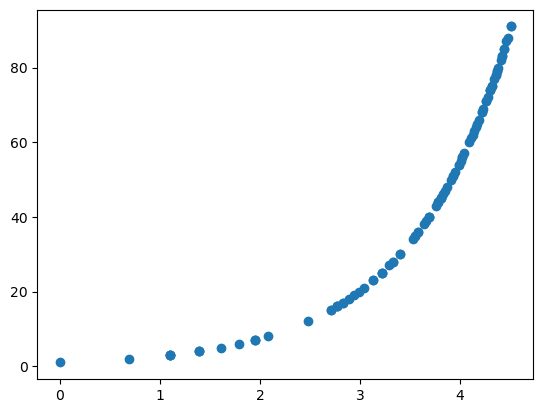

In [48]:
# Transformed data
# Log Transformation
plt.scatter(x = np.log(x), y = x)
np.corrcoef(np.log(x), y)
model2 = smf.ols('Salary ~ Experience', data = cdf_salary)

#### 2.3.b Separating data

Let's work with the data on different ways

2.3.b.1 Counting the number of employees per department

In [49]:
# Counting employees per department
cdf_salary_count = cdf_salary['WorkDepartment'].value_counts()
cdf_salary_count


HHRR          24
Marketing     24
Operations    22
Sales         17
Account       13
Name: WorkDepartment, dtype: int64

<Axes: title={'center': 'Employees per department'}>

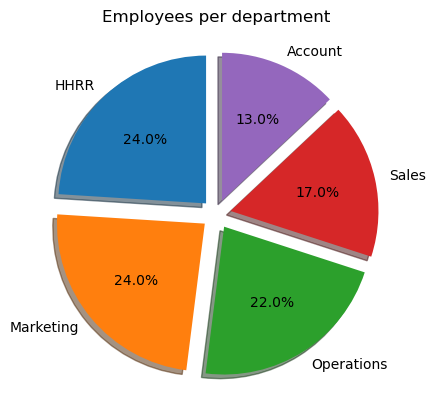

In [50]:
# Creating a plot to visualize the data
explode = [0.1] * len(cdf_salary_count)
cdf_salary['WorkDepartment'].value_counts().plot(
    kind='pie',
    explode=explode,
    title='Employees per department',
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    ylabel=''
)

2.3.b.2 Sorting values by 'Experience' and 'Salary'

In [54]:
cdf_salary.sort_values(['Experience', 'Salary'], ascending=False)

,ID,Name,Surname,WorkDepartment,Salary,Experience
20,GL5268,Robert,Clark,HHRR,48194,91.0
92,WV2546,Jaxon,Foster,Marketing,30713,91.0
75,BV1209,Savannah,Price,Operations,60624,88.0
95,SU8337,Madelyn,Alexander,Operations,59862,87.0
19,RH0053,Abigail,Robinson,Account,67101,85.0
...,...,...,...,...,...,...
66,BV8467,Wyatt,Torres,Operations,56490,3.0
83,HV9147,Penelope,Perry,Marketing,39871,3.0
86,BD4756,Julian,Patterson,HHRR,25958,3.0
61,CC6460,Brooklyn,Cooper,Account,44998,2.0


2.3.b.3 Group our data by Department

In [55]:
# Creating a dictionary to store the data from 'WorkDepartment'
grouped_departments = {}

# Group the data by each department, we also need to copy the data
for department, data in cdf_salary.groupby('WorkDepartment'):
    grouped_departments[department] = data.copy()
    
# Checking if the data is ok
print(grouped_departments)

{'Account':         ID      Name   Surname WorkDepartment  Salary  Experience
0   SZ2174      John     Smith        Account   65284        54.0
1   ZG8243     Emily   Johnson        Account   23194        36.0
19  RH0053   Abigail  Robinson        Account   67101        85.0
24  VI4934     David    Walker        Account   62218         3.0
53  FQ5081    Aubrey    Rogers        Account   39250        28.0
56  ET9072  Nicholas    Morgan        Account   71399        69.0
57  BH7650      Zoey      Bell        Account   61136        16.0
60  UM4299     Aiden    Rivera        Account   19204        63.0
61  CC6460  Brooklyn    Cooper        Account   44998         2.0
64  AM0081     Dylan    Howard        Account   49482        68.0
70  LD5111    Nathan     James        Account   46490        35.0
94  ID3572     Aaron    Bryant        Account   62422         7.0
96  NU0471   Brayden   Russell        Account   67130        75.0, 'HHRR':         ID      Name     Surname WorkDepartment  Salary

In [61]:
# Now we can create our data frame for each department by accessing our dictionary
sales_df = grouped_departments['Sales']
account_df = grouped_departments['Account']
hhrr_df = grouped_departments['HHRR']
operations_df = grouped_departments['Operations']
marketing_df = grouped_departments['Marketing']
sales_df

,ID,Name,Surname,WorkDepartment,Salary,Experience
2,LB2444,Michael,Williams,Sales,32951,62.0
6,GD4300,Daniel,Miller,Sales,21073,34.0
7,NK9946,Olivia,Wilson,Sales,57910,57.0
12,EF3588,Andrew,Jackson,Sales,58774,83.0
16,QT6110,Joseph,Thompson,Sales,44112,80.0
22,ME7089,William,Lewis,Sales,47594,74.0
34,ER4294,Richard,Green,Sales,71323,68.0
35,WR3782,Victoria,Adams,Sales,42876,44.0
37,MW3541,Avery,Gonzalez,Sales,19820,44.0
39,BU9606,Sofia,Carter,Sales,45834,4.0


2.3.b.4 Number of employees per department

In [68]:
# Let's count the employees per department using a function
def countEmployees(df):
    return df.shape[0]

sales_count = countEmployees(sales_df)
account_count = countEmployees(account_df)
hhrr_count = countEmployees(hhrr_df)
operations_count = countEmployees(operations_df)
marketing_count = countEmployees(marketing_df)

print(
    "Number of employees in Sales: ", sales_count, "\n",
    "Number of employees in HHRR: ", hhrr_count, "\n",
    "Number of employees in Account: ", account_count, "\n",
    "Number of employees in Marketing: ", marketing_count, "\n",
    "Number of employees in Operations: ", operations_count,
    )

Number of employees in Sales:  17 
 Number of employees in HHRR:  24 
 Number of employees in Account:  13 
 Number of employees in Marketing:  24 
 Number of employees in Operations:  22
